In [49]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_MIN_ICE_1m_20020101_20031231.nc']


In [50]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]




minice=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_ice_y2002m09.nc')
minice=minice.variables['ileadfra'][:]

minice_=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/Cryosphere2d_ANHA4-EXH001_icemod_y2001m09.nc')
minice_=minice_.variables['ileadfra'][:]

In [51]:
nasa=nc.Dataset('/ocean/xiaoxiny/research/\
data/findk/ice_concentration/seaice_conc_monthly_nh_f13_200209_v02r00.nc')

In [52]:
print nasa.variables
nasa_lat=nasa.variables['latitude'][:]
nasa_lon=nasa.variables['longitude'][:]

OrderedDict([(u'projection', <netCDF4.Variable object at 0x7fb74f984050>), (u'seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fb74f9840e8>), (u'stdev_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fb74f984180>), (u'melt_onset_day_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fb74f984218>), (u'qa_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fb74f9842b0>), (u'goddard_merged_seaice_conc_monthly', <netCDF4.Variable object at 0x7fb74f984348>), (u'goddard_nt_seaice_conc_monthly', <netCDF4.Variable object at 0x7fb74f9843e0>), (u'goddard_bt_seaice_conc_monthly', <netCDF4.Variable object at 0x7fb74f984478>), (u'time', <netCDF4.Variable object at 0x7fb74f984510>), (u'ygrid', <netCDF4.Variable object at 0x7fb74f9845a8>), (u'xgrid', <netCDF4.Variable object at 0x7fb74f984640>), (u'latitude', <netCDF4.Variable object at 0x7fb74f9846d8>), (u'longitude', <netCDF4.Variable object at 0x7fb74f984770>)])


In [53]:
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/59,78,79/*59*'))
icon=np.empty([80,58])

#lon,lat
import re
def context2array(context):
    return np.matrix([map(float, re.split('\s+', ln.strip()))
      for ln in context.splitlines() if ln.strip()])



file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/updated_lon.dat')
line_content = file_source.readlines()
lon_ice=np.empty([10,464])
for j in range(0, 464):
     lon_ice[:,j] = context2array(line_content[j])


file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/updated_lat.dat')
line_content = file_source.readlines()
lat_ice=np.empty([10,464])
for j in range(0, 464):
     lat_ice[:,j] = context2array(line_content[j])


        

iconlat=np.empty([80,58])
iconlon=np.empty([80,58])

for j in range (58):
    for k in range (8):
            iconlat[k*10:(k+1)*10,j]=lat_ice[:,j*8+k]
            iconlon[k*10:(k+1)*10,j]=lon_ice[:,j*8+k]
#icon
for k in range(1):
    file_source=open(filename[k])
    line_content = file_source.readlines()
    for i in range (58):
        split=map(''.join, zip(*[iter(line_content[i])]))
        for j in range (len(split)-1):
            if split[j]=='*':
                split[j]=10
            if split[j]=='.':
                split[j]=-1
            icon[j,i]=split[j] 
            

icon=np.ma.masked_where(icon<0,icon)
icon=np.ma.masked_where(np.isnan(icon),icon)

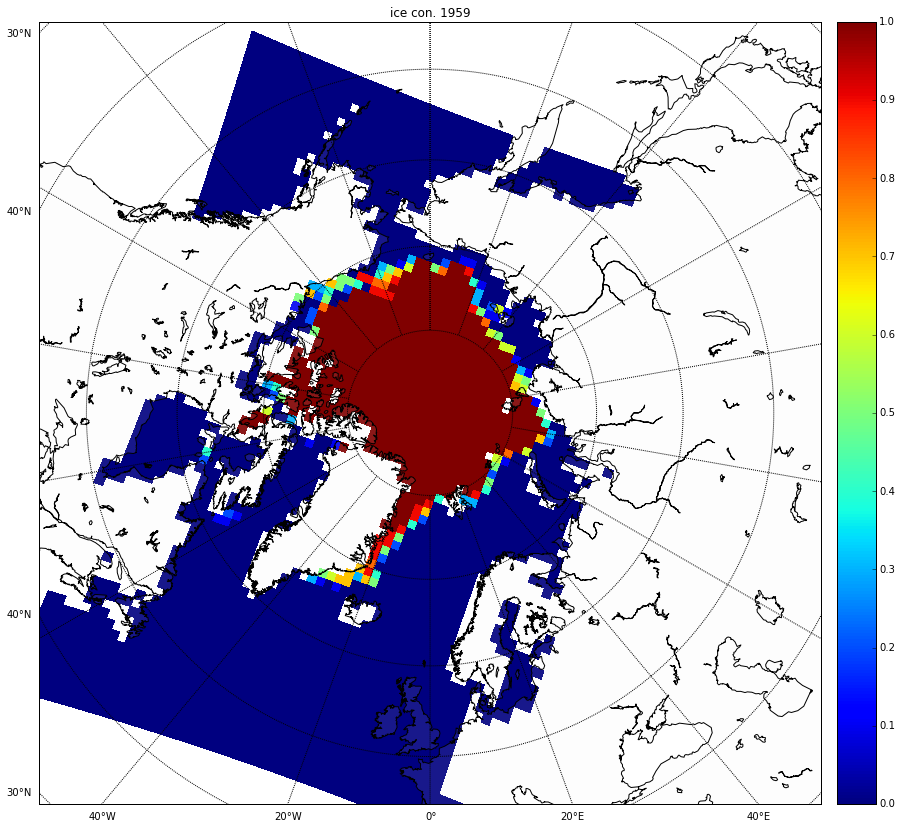

In [54]:


fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(iconlon,iconlat)
m.pcolor(x,y,icon/10,vmin=0, vmax=1)
m.colorbar()

plt.title("ice con. 1959")
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

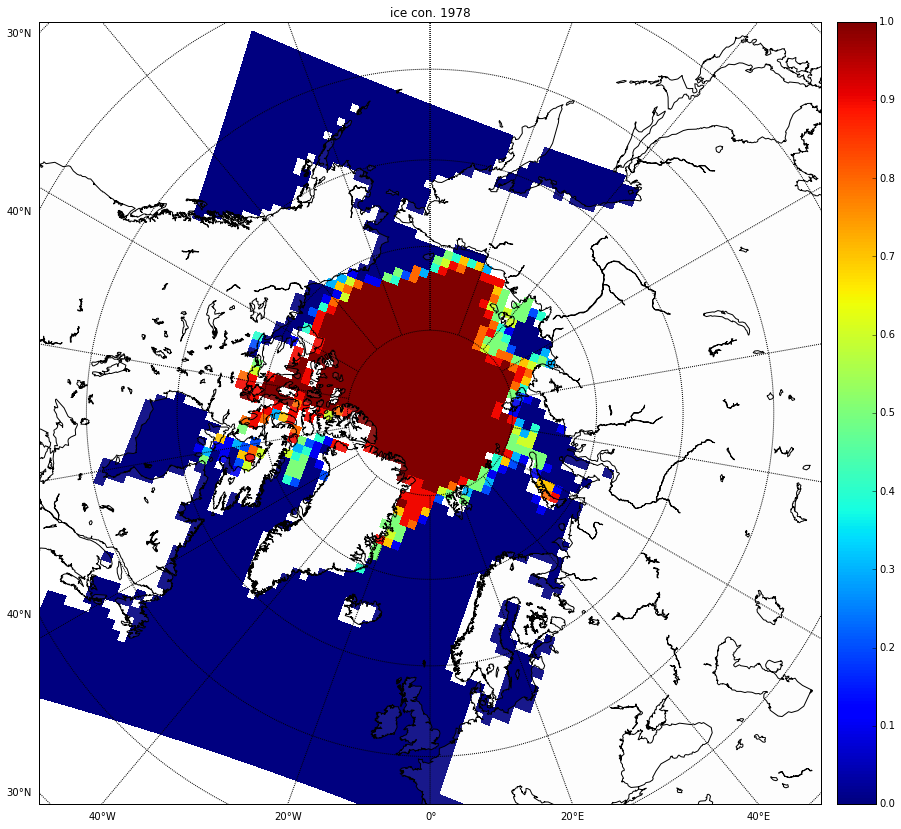

In [60]:
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/59,78,79/*78*'))
icon=np.empty([80,58])

#icon
for k in range(1):
    file_source=open(filename[k])
    line_content = file_source.readlines()
    for i in range (58):
        split=map(''.join, zip(*[iter(line_content[i])]))
        for j in range (len(split)-1):
            if split[j]=='*':
                split[j]=10
            if split[j]=='.':
                split[j]=-1
            icon[j,i]=split[j] 
            

icon=np.ma.masked_where(icon<0,icon)
icon=np.ma.masked_where(np.isnan(icon),icon)


fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(iconlon,iconlat)
m.pcolor(x,y,icon/10,vmin=0, vmax=1)
m.colorbar()

plt.title("ice con. 1978")
plt.show()

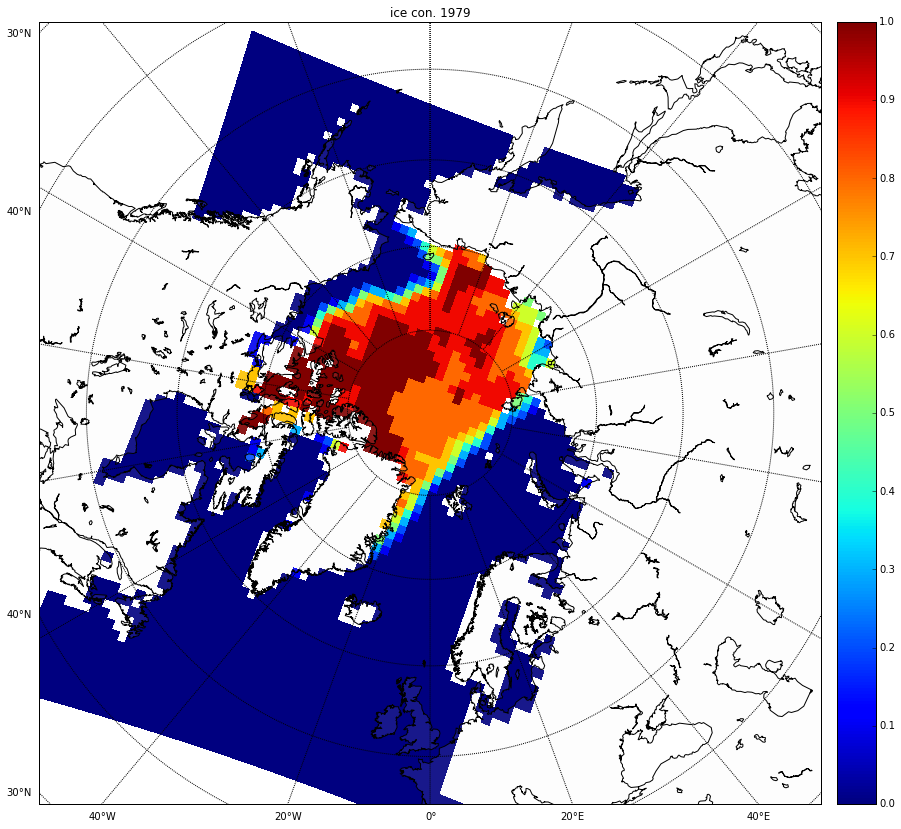

In [61]:
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/59,78,79/*79*'))
icon=np.empty([80,58])
#icon
for k in range(1):
    file_source=open(filename[k])
    line_content = file_source.readlines()
    for i in range (58):
        split=map(''.join, zip(*[iter(line_content[i])]))
        for j in range (len(split)-1):
            if split[j]=='*':
                split[j]=10
            if split[j]=='.':
                split[j]=-1
            icon[j,i]=split[j] 
            

icon=np.ma.masked_where(icon<0,icon)
icon=np.ma.masked_where(np.isnan(icon),icon)


fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(iconlon,iconlat)
m.pcolor(x,y,icon/10,vmin=0, vmax=1)
m.colorbar()

plt.title("ice con. 1979")
plt.show()

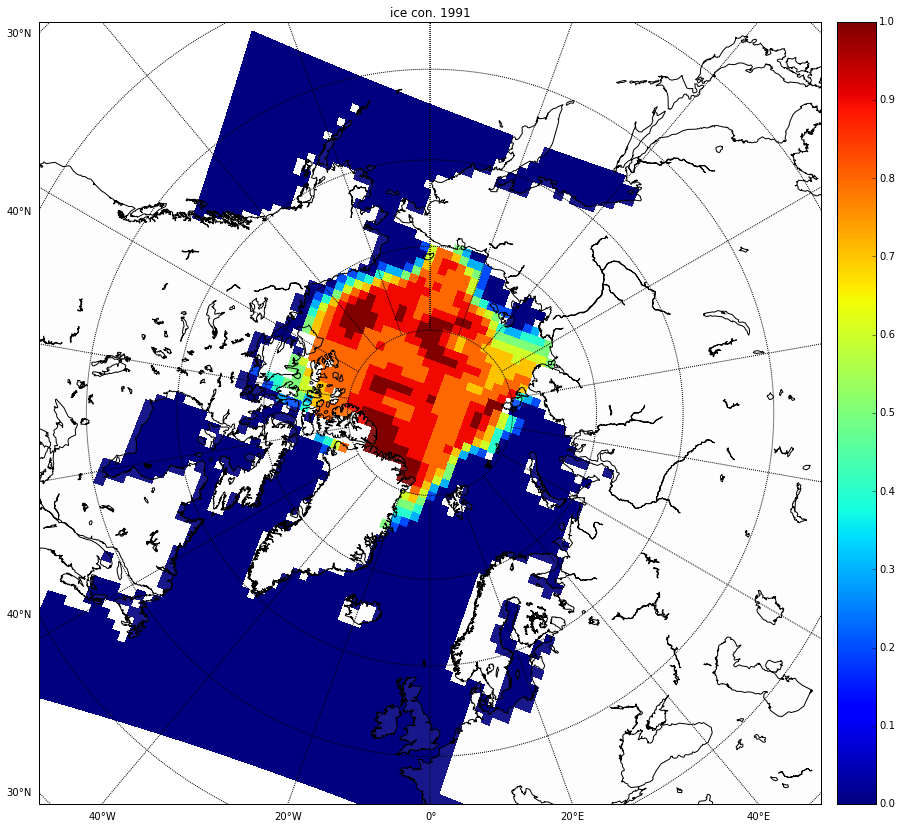

In [62]:
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/01/*9'))
icon=np.empty([80,58])
#icon
for k in range(1):
    file_source=open(filename[k])
    line_content = file_source.readlines()
    for i in range (58):
        split=map(''.join, zip(*[iter(line_content[i])]))
        for j in range (len(split)-1):
            if split[j]=='*':
                split[j]=10
            if split[j]=='.':
                split[j]=-1
            icon[j,i]=split[j] 
            

icon=np.ma.masked_where(icon<0,icon)
icon=np.ma.masked_where(np.isnan(icon),icon)


fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(iconlon,iconlat)
m.pcolor(x,y,icon/10,vmin=0, vmax=1)
m.colorbar()

plt.title("ice con. 1991")
plt.show()